## 1) Leia o arquivo lemonades.csv usando pandas.

In [62]:
import pandas as pd
lemonades = pd.read_csv('Lemonades.csv', sep = ";")

lemonades.head(n=10)

Date Location  Lemon  Orange  Temperature  Leaflets  Price
0  07/01/2016     Park     97      67           70      90.0   0.25
1  07/02/2016     Park     98      67           72      90.0   0.25
2  07/03/2016     Park    110      77           71     104.0   0.25
3  07/04/2016    Beach    134      99           76      98.0   0.25
4  07/05/2016    Beach    159     118           78     135.0   0.25
5  07/06/2016    Beach    103      69           82      90.0   0.25
6  07/06/2016    Beach    103      69           82      90.0   0.25
7  07/07/2016    Beach    143     101           81     135.0   0.25
8         NaN    Beach    123      86           82     113.0   0.25
9  07/09/2016    Beach    134      95           80     126.0   0.25

## 2) Retorne as informações sobre as colunas e as principais estatísticas sobre o dataset.

In [63]:
lemonades.describe()

Lemon      Orange  Temperature    Leaflets      Price
count   32.000000   32.000000    32.000000   31.000000  32.000000
mean   116.156250   80.000000    78.968750  108.548387   0.354688
std     25.823357   21.863211     4.067847   20.117718   0.113137
min     71.000000   42.000000    70.000000   68.000000   0.250000
25%     98.000000   66.750000    77.000000   90.000000   0.250000
50%    113.500000   76.500000    80.500000  108.000000   0.350000
75%    131.750000   95.000000    82.000000  124.000000   0.500000
max    176.000000  129.000000    84.000000  158.000000   0.500000

In [64]:
lemonades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
Date           31 non-null object
Location       32 non-null object
Lemon          32 non-null int64
Orange         32 non-null int64
Temperature    32 non-null int64
Leaflets       31 non-null float64
Price          32 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.9+ KB


## 3) Realize a limpeza do dataset
### a) verifique se existe valores nulos

In [65]:
lemonades.isna().sum()

Date           1
Location       0
Lemon          0
Orange         0
Temperature    0
Leaflets       1
Price          0
dtype: int64

### b) verifique e remova, se existir, linhas duplicadas

In [66]:
lemonades[lemonades.duplicated()]

Date Location  Lemon  Orange  Temperature  Leaflets  Price
6  07/06/2016    Beach    103      69           82      90.0   0.25

In [67]:
lemonades = lemonades.drop_duplicates()

In [68]:
lemonades[lemonades.duplicated()]

Empty DataFrame
Columns: [Date, Location, Lemon, Orange, Temperature, Leaflets, Price]
Index: []

### c) trate os elementos faltantes (interpolação (data) e media)

In [69]:
lemonades.dtypes

Date            object
Location        object
Lemon            int64
Orange           int64
Temperature      int64
Leaflets       float64
Price          float64
dtype: object

In [70]:
lemonades['Date'] = pd.to_datetime(lemonades['Date'])
lemonades.dtypes

Date           datetime64[ns]
Location               object
Lemon                   int64
Orange                  int64
Temperature             int64
Leaflets              float64
Price                 float64
dtype: object

In [71]:
import numpy as np

t0 = lemonades.Date.min()
m = lemonades.Date.notnull()
lemonades.loc[m, 'Date_int'] = (lemonades.loc[m, 'Date'] - t0).dt.total_seconds()
lemonades['Date'] = np.datetime64(t0) + pd.to_timedelta(lemonades.Date_int.interpolate(), unit='s')

del lemonades['Date_int']

In [72]:
lemonades.isna().sum()

Date           0
Location       0
Lemon          0
Orange         0
Temperature    0
Leaflets       1
Price          0
dtype: int64

In [73]:
lemonades['Leaflets'].fillna((lemonades['Leaflets'].mean()), inplace=True)

In [74]:
lemonades.isna().sum()

Date           0
Location       0
Lemon          0
Orange         0
Temperature    0
Leaflets       0
Price          0
dtype: int64

In [75]:
lemonades['Date'].min()

Timestamp('2016-07-01 00:00:00')

In [76]:
lemonades['Date'].max()

Timestamp('2016-07-31 00:00:00')

## 4) Adicione uma coluna chamada "Sales" que contém o total de vendas de limão e laranja

In [77]:
lemonades["Sales"] = lemonades["Lemon"] + lemonades["Orange"]
lemonades.head()

Date Location  Lemon  Orange  Temperature  Leaflets  Price  Sales
0 2016-07-01     Park     97      67           70      90.0   0.25    164
1 2016-07-02     Park     98      67           72      90.0   0.25    165
2 2016-07-03     Park    110      77           71     104.0   0.25    187
3 2016-07-04    Beach    134      99           76      98.0   0.25    233
4 2016-07-05    Beach    159     118           78     135.0   0.25    277

## 5) Adicione uma coluna chamada "Revenue" que calcula o lucro (venda*preço)

In [78]:
lemonades["Revenue"] = lemonades["Sales"] * lemonades["Price"]
lemonades.head()

Date Location  Lemon  Orange  Temperature  Leaflets  Price  Sales  \
0 2016-07-01     Park     97      67           70      90.0   0.25    164   
1 2016-07-02     Park     98      67           72      90.0   0.25    165   
2 2016-07-03     Park    110      77           71     104.0   0.25    187   
3 2016-07-04    Beach    134      99           76      98.0   0.25    233   
4 2016-07-05    Beach    159     118           78     135.0   0.25    277   

   Revenue  
0    41.00  
1    41.25  
2    46.75  
3    58.25  
4    69.25

## 6) Escreva uma função que retorne o lucro total

In [79]:
def total_revenue(df):
    return df["Revenue"].sum()
    
total_revenue(lemonades)

2138.0

## 7) Escreva uma função que receba dois parâmetros, dataset e temp(int). Se temp for 1, ele retorna a máxima temperatura observada no conjunto de dados; se 0, retorna a média do período observado; se -1, retorna a temperatura mínima.

In [80]:
def funcao_temp(dataset, temp):
    if(temp == 1):
        return dataset["Temperature"].max()
    elif(temp == 0):
        return dataset["Temperature"].mean()
    elif(temp == -1):
        return dataset["Temperature"].min()
    
print(funcao_temp(lemonades, -1))
print(funcao_temp(lemonades, 0))
print(funcao_temp(lemonades, 1))

70
78.87096774193549
84


## 8) Escreva uma função que receba dois parâmetros (dataset, localização) e retorne o dataset com o preço do limão e laranja ajustados em 15% se a localização for 'Park' ou ajustados em 10% se a localização for 'Beach'.

In [81]:
def get_adjusted_price(dataset, location):
    multiplier = 1.10 if location == "Beach" else 1.15 if location == "Park" else 1
    return dataset[["Lemon", "Orange"]] * multiplier
        
print(get_adjusted_price(lemonades, "Beach").head())
print(get_adjusted_price(lemonades, "Park").head())

   Lemon  Orange
0  106.7    73.7
1  107.8    73.7
2  121.0    84.7
3  147.4   108.9
4  174.9   129.8
    Lemon  Orange
0  111.55   77.05
1  112.70   77.05
2  126.50   88.55
3  154.10  113.85
4  182.85  135.70


## 9) Escreva uma função que receba o dataset como parâmetro e retorne o dataset com uma coluna a mais que mostre o rank de temperatura. O dataset retornado precisa estar ordenado de acordo com rank(descendente)

In [82]:
def rank(dataset):
    dataset['rank'] = dataset['Temperature'].rank(ascending=0, method='min')
    return dataset.sort_values(by='rank')

rank(lemonades).head()

Date Location  Lemon  Orange  Temperature  Leaflets  Price  Sales  \
25 2016-07-25     Park    156     113           84     135.0   0.50    269   
12 2016-07-12    Beach    130      95           84      99.0   0.25    225   
26 2016-07-26     Park    176     129           83     158.0   0.35    305   
11 2016-07-11    Beach    162     120           83     135.0   0.25    282   
24 2016-07-24     Park    121      82           82     117.0   0.50    203   

    Revenue  rank  
25   134.50   1.0  
12    56.25   1.0  
26   106.75   3.0  
11    70.50   3.0  
24   101.50   5.0

## 10) Imprima um gráfico de linha que retorne o lucro ao longo do tempo

In [83]:
lemonades = lemonades.set_index('Date')
lemonades.head(3)

Location  Lemon  Orange  Temperature  Leaflets  Price  Sales  \
Date                                                                      
2016-07-01     Park     97      67           70      90.0   0.25    164   
2016-07-02     Park     98      67           72      90.0   0.25    165   
2016-07-03     Park    110      77           71     104.0   0.25    187   

            Revenue  rank  
Date                       
2016-07-01    41.00  30.0  
2016-07-02    41.25  28.0  
2016-07-03    46.75  29.0

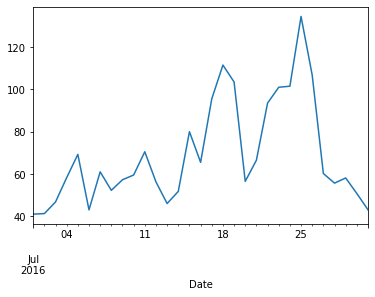

In [85]:
lemonades['Revenue'].plot()

## 11) Crie um scatter-plot leaflets x sales. Existe alguma correlação entre os dados?(Use a correlação de Pearson e explique o significado do valor obtido por ela)

Text(0, 0.5, 'Sales')

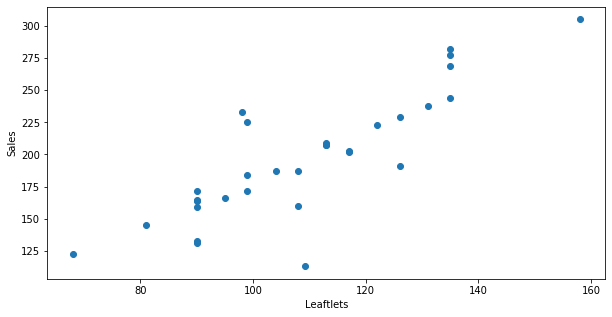

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))
plt.scatter(lemonades['Leaflets'], lemonades['Sales'])
plt.xlabel('Leaftlets')
plt.ylabel('Sales')

In [98]:
from scipy.stats import pearsonr

corr, _ = pearsonr(lemonades['Leaflets'], lemonades['Sales'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.843


Podemos ver que Leaflets e Sales são positivamente correlacionados, e a correlação de Pearson é 0.843. Isso sugeste um alto nível de correlação entre as duas variáveis.

## 12) Crie um histograma com 10 bins que mostre o lucro (revenue). 

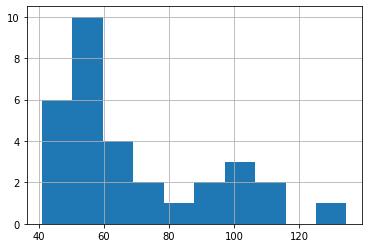

In [99]:
lemonades['Revenue'].hist(bins=10)

## 13) Crie um gráfico de linha que mostre o lucro por tipo de fruta ao longo do tempo.

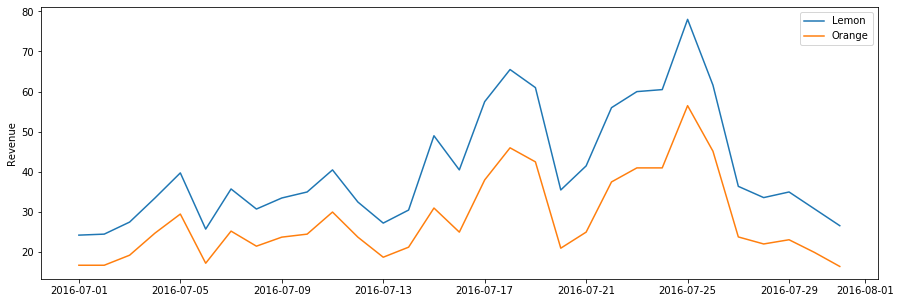

In [127]:
plt.figure(figsize=(15,5))
plt.plot(lemonades['Lemon'] * lemonades['Price'], label='Lemon')
plt.plot(lemonades['Orange'] * lemonades['Price'], label='Orange')
plt.ylabel('Revenue')
plt.legend()

## 14) Ajuste uma Regressão Linear aos dados para predizer vendas usando cada uma das features abaixo:

Dado a pequena quantidade de observações, nos exercícios abaixo os dados não foram separados entre conjuntos de teste e de treino. Foi utilizado o dataset inteiro para treinar e predizer.

In [696]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt

y_sales = lemonades['Sales'].values

### a. Temperature

In [701]:
X_temperature = lemonades['Temperature'].values

lr_model_temperature = linear_model.LinearRegression()
lr_model_temperature.fit(X_temperature.reshape(-1, 1), y_sales.reshape(-1, 1))

y_temperature_pred = lr_model_temperature.predict(X_temperature.reshape(-1, 1))
rmse = sqrt(mean_squared_error(y_sales, y_temperature_pred))
print('RMSE: %.3f' % rmse)

RMSE: 41.962


### b. Leaflets

In [702]:
X_leaflets = lemonades['Leaflets'].values

lr_model_leaflets = linear_model.LinearRegression()
lr_model_leaflets.fit(X_leaflets.reshape(-1, 1), y_sales.reshape(-1, 1))

y_leaflets_pred = lr_model_leaflets.predict(X_leaflets.reshape(-1, 1))
rmse = sqrt(mean_squared_error(y_sales, y_leaflets_pred))
print('RMSE: %.3f' % rmse)

RMSE: 25.489


### c. Price

In [703]:
X_price = lemonades['Price'].values

lr_model_price = linear_model.LinearRegression()
lr_model_price.fit(X_price.reshape(-1, 1), y_sales.reshape(-1, 1))

y_price_pred = lr_model_price.predict(X_price.reshape(-1, 1))

rmse = sqrt(mean_squared_error(y_sales, y_price_pred))
print('RMSE: %.3f' % rmse)

RMSE: 45.368


### d. Retorne um gráfico com a reta ajustada aos dados para cada feature e diga se ela é uma variável boa ou não para predizer vendas.

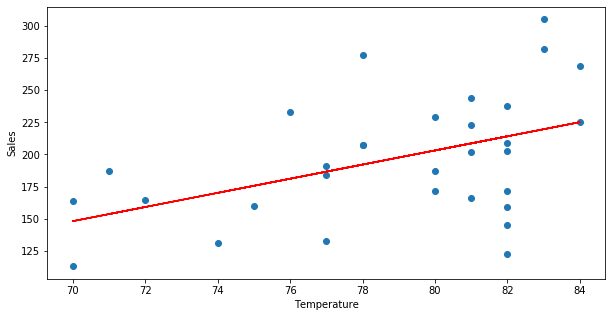

In [204]:
plt.figure(figsize=(10,5))
plt.scatter(lemonades['Temperature'], lemonades['Sales'])
plt.xlabel('Temperature')
plt.ylabel('Sales')
plt.plot(X_temperature, y_temperature_pred, color='red')

In [214]:
corr, _ = pearsonr(lemonades['Temperature'], lemonades['Sales'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.467


Analisando o gráfico e os dados acima, é possível identificar uma correlação entre as variáveis Temperature e Sales. Entretato essa relação não é forte o suficiente para que Temperature seja uma boa preditora para Sales. O RMSE foi de 41.96.

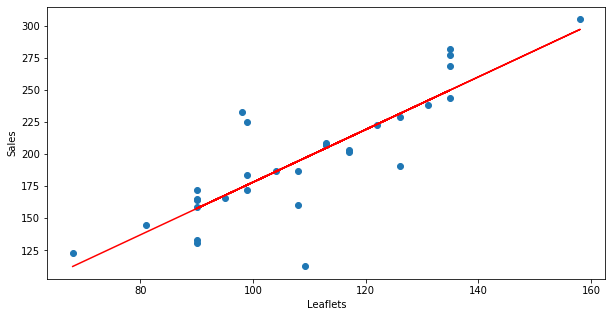

In [205]:
plt.figure(figsize=(10,5))
plt.scatter(lemonades['Leaflets'], lemonades['Sales'])
plt.xlabel('Leaflets')
plt.ylabel('Sales')
plt.plot(X_leaflets, y_leaflets_pred, color='red')

A variável Leaflets é bom preditor para Sales. O RMSE foi baixo, tem uma alta correlação de Pearson, e o gráfico mostra claramente uma linearidade entre Leaflets e Sales.

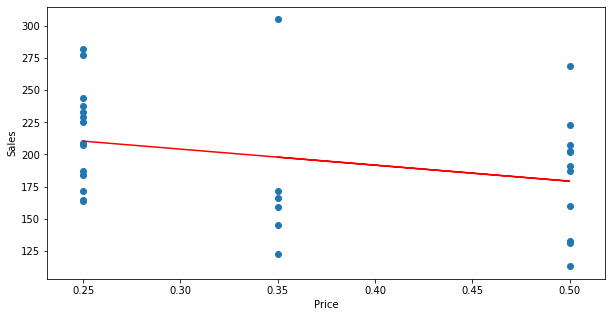

In [206]:
plt.figure(figsize=(10,5))
plt.scatter(lemonades['Price'], lemonades['Sales'])
plt.xlabel('Price')
plt.ylabel('Sales')
plt.plot(X_price, y_price_pred, color='red')

In [215]:
corr, _ = pearsonr(lemonades['Price'], lemonades['Sales'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.293


Das três variáveis analisadas, "Price" foi a pior variável pra predizer "Sales". Entretato, é possível identificar uma correlação negativa entre elas, como podemos ver no gráfico e na correlação de Pearson.

### 15) Ajuste uma Regressão Linear aos dados para predizer vendas usando as três features juntas. Comente o resultado obtido.

In [704]:
X = lemonades[['Temperature', 'Leaflets', 'Price']].values

lr_model = linear_model.LinearRegression()
lr_model.fit(X, y_sales.reshape(-1, 1))

y_pred = lr_model.predict(X)

rmse = sqrt(mean_squared_error(y_sales, y_pred))
print('RMSE: %.3f' % rmse)

RMSE: 17.594


Utilizando as três variáveis em conjunto foi possível obter um resultado muito melhor do que com cada variável separadamente. O RMSE da regressão foi de 17.59, bem abaixo do que havia sido calculado anteriormente.

## 16) Generalize o algoritmo de Regressão Linear implementada em sala para que ele possa ser usado para regressão multivariada.

In [651]:
class LinearRegressionMultivariate():
    
    def cost_function(self,X,y,theta):
        m = len(y) #número de amostras
        J = 0 # custo
        
        J = np.sum(np.square(np.dot(X, theta) - y))
        return J*(1/(2*m))
    
    def gradient_descent(self, X, y, theta, alpha = 0.0005, num_iter = 1500):
        m = len(y)
        J_history = np.zeros(num_iter)
        
        for k in range(num_iter):   
            hypothesis = np.dot(X, theta)
            loss = hypothesis - y
            gradient = np.dot(X.transpose(), loss) / m
            theta = theta - alpha * gradient
            J_history[k] = self.cost_function(X, y, theta)
            
        return theta, J_history

### 17) Aplique o algoritmo implementado na questão 16 no conjunto de dados consumo_cerveja.csv usando as mesmas features para treinamento.

In [709]:
df_beer = pd.read_csv('consumo_cerveja.csv', nrows=365, delimiter=';')
df_beer.head()

Data  Temperatura Media (C)  Temperatura Minima (C)  \
0  01/01/2015                  27.30                    23.9   
1  02/01/2015                  27.02                    24.5   
2  03/01/2015                  24.82                    22.4   
3  04/01/2015                  23.98                    21.5   
4  05/01/2015                  23.82                    21.0   

   Temperatura Maxima (C)  Precipitacao (mm)  Final de Semana  \
0                    32.5                0.0                0   
1                    33.5                0.0                0   
2                    29.9                0.0                1   
3                    28.6                1.2                1   
4                    28.3                0.0                0   

   Consumo de cerveja (litros)  
0                       25.461  
1                       28.972  
2                       30.814  
3                       29.799  
4                       28.900

In [710]:
df_beer = df_beer.rename(columns={'Temperatura Media (C)':'meanTemp','Temperatura Minima (C)':'minTemp','Temperatura Maxima (C)':'maxTemp',
                       'Precipitacao (mm)':'precip','Final de Semana':'weekend','Consumo de cerveja (litros)':'consumo'})
df_beer.head()

Data  meanTemp  minTemp  maxTemp  precip  weekend  consumo
0  01/01/2015     27.30     23.9     32.5     0.0        0   25.461
1  02/01/2015     27.02     24.5     33.5     0.0        0   28.972
2  03/01/2015     24.82     22.4     29.9     0.0        1   30.814
3  04/01/2015     23.98     21.5     28.6     1.2        1   29.799
4  05/01/2015     23.82     21.0     28.3     0.0        0   28.900

In [711]:
feature_col = ['maxTemp','precip','weekend']
meta_col = ['consumo']

X = df_beer[feature_col].values
y = df_beer[meta_col].values.ravel()

ones = np.ones([X.shape[0],1])
X = np.concatenate((ones, X), axis=1)
m, n = np.shape(X)

split_test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

In [712]:
lr_geral = LinearRegressionMultivariate()
theta = np.zeros(n)
theta_lr, custo_h = lr_geral.gradient_descent(X_train, y_train, theta, num_iter = 100000)
theta_lr

array([ 4.62958867,  0.73050834, -0.04940106,  5.50177571])

In [713]:
# Realizando predições para os dados de teste
Yfit = np.matmul(X_test, theta_lr)
Yfit

array([25.59517816, 27.26935649, 28.41840942, 21.28517892, 27.53791005,
       17.19160338, 22.23483977, 18.29009471, 17.38878417, 20.48161975,
       32.47997962, 27.05619485, 25.15104253, 25.93468105, 20.18941641,
       22.0887381 , 28.37110987, 27.15904655, 24.64551731, 28.90542884,
       35.11474977, 21.72348393, 29.90985429, 18.98371694, 24.66848044,
       24.79161898, 29.27068301, 30.41653323, 22.67209403, 24.13416147,
       24.56763615, 30.00119135, 28.51721154, 32.93205419, 23.47670396,
       27.15220881, 27.71365236, 23.51801265, 25.01077148, 31.90051305,
       28.15195736, 32.63102139, 27.87283694, 24.1571246 , 24.96253096,
       32.04661472, 24.71856814, 25.06459512, 26.30740027, 29.43381629,
       29.27068301, 32.17443016, 32.04661472, 34.45729226, 19.89721307,
       25.8873815 , 31.60830971, 30.96462177, 27.21729277, 24.26828142,
       22.1321483 , 28.27230775, 24.86435616, 23.45106246, 29.46687238,
       29.6941677 , 25.15687315, 19.33509176, 19.67806057, 23.84

In [714]:
mse_1 = mean_squared_error(y_test, Yfit)
print('MSE utilizando Gradiente Descendente: %.3f' % mse_1)

MSE utilizando Gradiente Descendente: 5.602


In [715]:
it = list(range(1,1001))
df_custo = pd.DataFrame({'Iteracoes':it,'Custo':custo_h[:1000]})

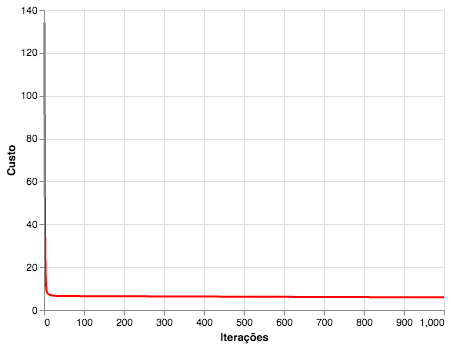

In [716]:
import altair as alt

custo_plot = alt.Chart(df_custo).mark_line(color='red').encode(
    x=alt.X('Iteracoes',axis=alt.Axis(title='Iterações')),
    y=alt.Y('Custo',axis=alt.Axis(title='Custo'))
)
custo_plot

#### Comparando os resultados com os obtidos através da Scikit-Learn 

In [717]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [718]:
# Realizando predições para os dados de teste
y_pred = lr_model.predict(X_test)

In [719]:
y_pred

array([25.5541415 , 27.07130999, 28.11812711, 21.61574405, 27.32462467,
       17.73421627, 22.48352654, 18.87889158, 18.051333  , 20.88146656,
       32.15210511, 26.88919148, 25.24055058, 25.84854213, 20.61445656,
       22.35002154, 28.09073647, 27.09284136, 24.68635901, 28.88653837,
       34.5605008 , 22.01625904, 29.70779574, 19.26100071, 25.01489341,
       24.81986401, 29.22030086, 29.95980645, 22.87120826, 24.21909152,
       24.45055214, 29.88782585, 28.22424147, 32.55570399, 23.61831902,
       27.28447838, 27.48996398, 23.62757067, 25.02012151, 31.62339083,
       27.89047897, 32.29091582, 27.94139194, 24.54762592, 24.81614895,
       31.75689583, 24.75311151, 24.79701447, 26.10838888, 29.23164091,
       29.22030086, 31.77712322, 31.75689583, 33.9597283 , 20.34744656,
       25.8211515 , 31.35638084, 30.75869223, 26.59357011, 24.31631853,
       22.38493973, 27.98462211, 24.82775587, 23.41520851, 29.09202396,
       29.6048987 , 25.1536265 , 19.75542797, 20.14718906, 23.95

In [720]:
mse_2 = mean_squared_error(y_test, y_pred)
print('MSE utilizando Scikit-Learn: %.3f' % mse_2)

MSE utilizando Scikit-Learn: 5.481


Comparando o resultado das predições do modelo feito com o gradiente descendente multivariado e o algoritmo da Scikit-Learn, é possível verificar que ambos apresentaram resultados muito parecidos. O valor abaixo é a fórmula do MSE, que foi aplicada para comparar o resultado dos dois modelos. Note que o valor é pequeno, indicando que as predições foram muito similares.

In [721]:
np.square(np.subtract(Yfit, y_pred)).mean() 

0.08878185265348235